# Task 2
### Before we start, let's import neccessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from Crypto.Cipher import AES
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 10]   # size of matplotlib windows

### Add the open source constants for AES-128 protocol

In [2]:
# substitution box for aes-128
Sbox = (0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

Sbox = np.array(Sbox)   # using the numpy array in order to call Sbox[array]


# inverse subtitution box for aes-128
InvSbox = (0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
           0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
           0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
           0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
           0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
           0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
           0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
           0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
           0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
           0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
           0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
           0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
           0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
           0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
           0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
           0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d)

InvSbox = np.array(InvSbox)      # using the numpy array in order to call InvSbox[array]

# round constants for AES-128
rConstants = [0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36,
              0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97,
              0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72,
              0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66,
              0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04,
              0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d,
              0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3,
              0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61,
              0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a,
              0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
              0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc,
              0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5,
              0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a,
              0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d,
              0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c,
              0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35,
              0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4,
              0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc,
              0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08,
              0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a,
              0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d,
              0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2,
              0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74,
              0xe8, 0xcb]

# every round constants is the block from 4 bytes, where the first number is from rConstants
# and 3 next bytes are zeros
for i in range(len(rConstants)):
    rConstants[i] = [rConstants[i]] + [0x00] * 3

rConstants = np.array(rConstants)


### Functions from the task1.
"Cross all bytes" was changed because we attack the last round of cryptographic protocol in this version. 

In [3]:
# Hamming weight for numbers from 0 to 255
hw = [bin(n).count("1") for n in range(0, 256)]


def cor2(x, y):
    """ Absolute value of Pearson Correlation Coefficient for 2 sets

    :param x: numpy array of values
    :param y: numpy array of values
    :return: float number from 0 to 1
    """
    meanX = np.mean(x)
    meanY = np.mean(y)
    x = x - meanX
    y = y - meanY
    cov = sum(x*y)
    meanQuadraticX = sum(x ** 2)
    meanQuadraticY = sum(y ** 2)
    res = cov / np.sqrt(meanQuadraticX * meanQuadraticY)
    return abs(res)


def cross_all_bytes(texts_out, byte_num, n):
    """ Byte search function (iterator).
    For each byte from 0 to 255 builds array of leakages for all traces in the context of
    our math model (attack on the last round).

    :param texts_out: numpy array of cipher text
    :param byte_num: a number of the byte we search
    :param n: amount of traces
    :return: supposed byte (int number), array of leakages
    """
    for hyp in range(256):
        leak_array = np.zeros(n)
        for _i in range(n):
            leak_array[_i] = hw[InvSbox[texts_out[_i][byte_num] ^ hyp]]
        yield hyp, leak_array


### Funciton for cleaning the traces
We just use the scipy functions signall.butter and signal.lfilter.

In [4]:
def clean(tr, _b, _a):
    """ Cleaning function

    :param tr: array of traces
    :param _b: result of signal.butter
    :param _a: result of signal.butter
    :return: clear traces
    """
    for _i in range(len(tr)):
        tr[_i] = signal.lfilter(_b, _a, tr[_i])
    return tr


### Let's get started.

Read the input array of traces, clean it and plot both before and after in order to compare.
Read the input and output traces too.

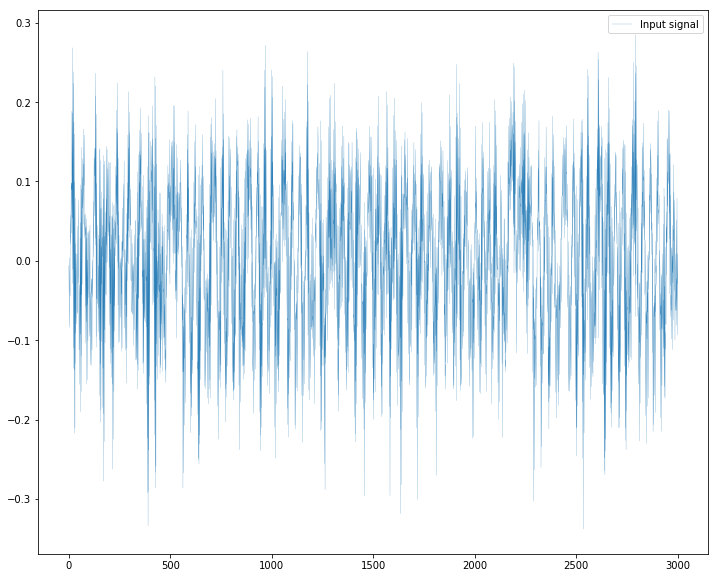

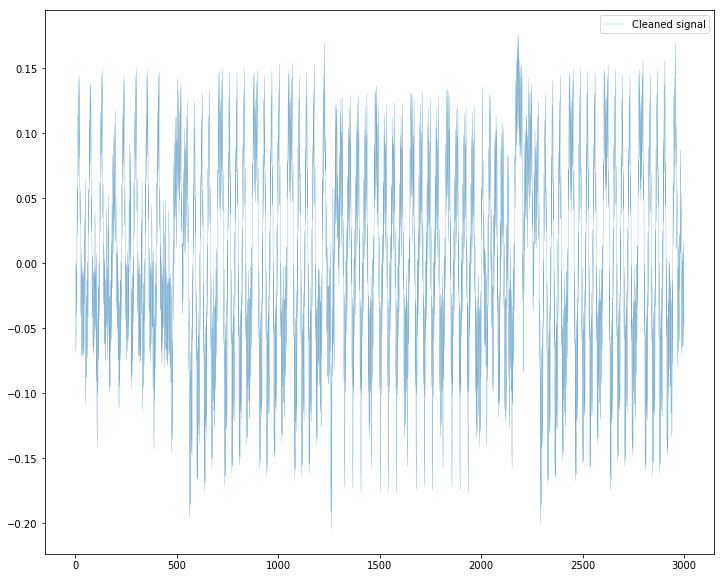

In [5]:
# load dataset
textIn = np.load('textin.npy')
textOut = np.load('textout.npy')
traces = np.load('traces.npy')

plt.plot(traces[0], linewidth=0.2, label='Input signal')
plt.legend(loc='best')
plt.show()
# clean traces using scipy functions
b, a = signal.butter(6, 0.65, btype='low')
traces = clean(traces, b, a)

plt.plot(traces[0], linewidth=0.2, label='Cleaned signal')
plt.legend(loc='best')
plt.show()


### The main part of the program - key picking, like in task 1.

In [6]:
traces_amount = len(textIn)
meas_amount = len(traces[0])
tmp_traces = np.transpose(traces)    # addition transposed array of traces


key = []             # array of best bytes
leak_places = []     # array of the moments of time where the best bytes was found
max_cors = []

for k in range(16):
    max_cor = 0      # max correlation for each byte
    best_byte = 0    # the value of the best byte
    leak_place = 0   # moment of time where the best byte was found
    for byte, leak in cross_all_bytes(textOut, k, traces_amount):

        for i in range(meas_amount):           # for each byte we search the biggest correlation
            real_values = tmp_traces[i]        # array of real values of the power consumption
            tmp_cor = cor2(leak, real_values)  # leak - array of supposed values of the power consumption
            if tmp_cor > max_cor:
                max_cor = tmp_cor
                best_byte = byte
                leak_place = i
        # print(byte)

    leak_places.append(leak_place)
    key.append(best_byte)
    max_cors.append(max_cor)
    print('\nbyte number:', k)                # print the information
    print('best byte:', best_byte)
    print('max correlation:', max_cor)
    print('leak place:', leak_places[-1])



byte number: 0
best byte: 160
max correlation: 0.9320543452059887
leak place: 564

byte number: 1
best byte: 18
max correlation: 0.9178042304535509
leak place: 772

byte number: 2
best byte: 2
max correlation: 0.8810112352123489
leak place: 984

byte number: 3
best byte: 26
max correlation: 0.9407865302566267
leak place: 1192

byte number: 4
best byte: 245
max correlation: 0.9236743963805573
leak place: 736

byte number: 5
best byte: 5
max correlation: 0.9169175675472793
leak place: 948

byte number: 6
best byte: 43
max correlation: 0.9295831663088655
leak place: 1152

byte number: 7
best byte: 216
max correlation: 0.9432736963595649
leak place: 672

byte number: 8
best byte: 26
max correlation: 0.8961537482754895
leak place: 908

byte number: 9
best byte: 128
max correlation: 0.8804349335657168
leak place: 1116

byte number: 10
best byte: 193
max correlation: 0.9249478114985482
leak place: 636

byte number: 11
best byte: 217
max correlation: 0.9129407237533226
leak place: 848

byte n

### Print the results

In [7]:
print('found key:', key)
print('leakage places:', leak_places)
print('max correlations:', max_cors)

found key: [160, 18, 2, 26, 245, 5, 43, 216, 26, 128, 193, 217, 6, 28, 217, 240]
leakage places: [564, 772, 984, 1192, 736, 948, 1152, 672, 908, 1116, 636, 848, 1080, 600, 808, 1016]
max correlations: [0.9320543452059887, 0.9178042304535509, 0.8810112352123489, 0.9407865302566267, 0.9236743963805573, 0.9169175675472793, 0.9295831663088655, 0.9432736963595649, 0.8961537482754895, 0.8804349335657168, 0.9249478114985482, 0.9129407237533226, 0.9095053816643034, 0.9179132372710977, 0.9306994085062099, 0.9538669322510288]


### Key rebuilding.

Now we go to the second big part of the program. We got the 10th round key, and now we need to get the main key.
Before we start, let's declare some functions uses in AES.

In [8]:
NROUNDS = 11  # amount of rounds
N = 4         # amount of 4-bytes blocks in key


def rot_word(array: list):
    """ Standard RotWord function in AES.

    change array [1, 2, 3, 4] -> [2, 3, 4, 1]
    :param array: python list
    :return: changed python list
    """
    return array[1:] + [array[0]]


def xor(array1, array2):
    """ Vectorized exclusive OR.

    :param array1: first vector (iterable)
    :param array2: second vector (iterable)
    :return: vector with coordinates that are XOR of the relevant
    coordinates of array1 and array2
    """
    return np.array(list(map(lambda a, b: a ^ b, array1, array2)))


Procedure of the rebuilding is very simple if you know the direct way of key expansion uses in AES. We just need to swap the w_i (4-bytes block computing on ith iteration) and w_i-N (4-bytes block we computed N iterations before).
It works because the element in GF(2^N) is same with its negative, so A + A = 0 in GF(2^N). Thus if we swap the w_i and w_i-N, that stand on the opposite sides of '=', their signs won't change. 

In [9]:
def inv_key_schedule(last_key: np.ndarray):
    """ Compute the main key of AES using key of the last round (10-th)

    This is inverse variation of AES piece named 'Key Expansion'
    :param last_key: array of numbers from 0 to 255
    :return: array of numbers from 0 to 255
    """
    w = np.zeros((N * NROUNDS, 4), int)             # array of 4-bytes blocks (every N bytes is the one round key)
    w[N * NROUNDS - N:] = last_key.reshape(N, 4)    # The last N blocks is the last key
    res_key = np.zeros((N, 4), int)                 # The first N blocks is the main key
    for i in range(N * NROUNDS - 1, -1, -1):
        if i < N:                      # just algorithm from wikipedia where w_i and w_i-N are swapped
            res_key[i] = w[i]
        elif i >= N and i % N == 0:
            w[i - N] = w[i] ^ rot_word(list(Sbox[w[i - 1]])) ^ rConstants[i // N]
        elif i >= N > 6 and i % N == 4:
            w[i - N] = w[i] ^ Sbox[w[i - 1]]
        else:
            w[i - N] = w[i - 1] ^ w[i]

    for i, row in enumerate(w):   # for debugging print all the round keys
        if i % 4 == 0:
            print()
        print(row)

    return list(res_key.reshape(1, N * 4)[0])


### Check the correctness.

Finally, let's compute the main key using the found one and compare output text with input handled by AES (where we use the main key).

In [12]:
final_key = inv_key_schedule(np.array(key))

print('key:', bytes(final_key))
test_cipher = AES.new(bytes(final_key), AES.MODE_ECB)  # mode for AES - electronic codebook
print('plaintext:', bytes(list(textIn[0])))
print('ciphertext in files:       ', bytes(list(textOut[0])))
print('ciphertext using found key:', test_cipher.encrypt(bytes(list(textOut[0]))))



[ 84  65 124  60]
[ 51  32  84 124]
[ 45 124  51  32]
[ 82  49  53 107]

[146 215   3  60]
[161 247  87  64]
[140 139 100  96]
[222 186  81  11]

[100   6  40  33]
[197 241 127  97]
[ 73 122  27   1]
[151 192  74  10]

[218 208  79 169]
[ 31  33  48 200]
[ 86  91  43 201]
[193 155  97 195]

[198  63  97 209]
[217  30  81  25]
[143  69 122 208]
[ 78 222  27  19]

[203 144  28 254]
[ 18 142  77 231]
[157 203  55  55]
[211  21  44  36]

[178 225  42 152]
[160 111 103 127]
[ 61 164  80  72]
[238 177 124 108]

[ 58 241 122 176]
[154 158  29 207]
[167  58  77 135]
[ 73 139  49 235]

[135  54 147 139]
[ 29 168 142  68]
[186 146 195 195]
[243  25 242  40]

[ 72 191 167 134]
[ 85  23  41 194]
[239 133 234   1]
[ 28 156  24  41]

[160  18   2  26]
[245   5  43 216]
[ 26 128 193 217]
[  6  28 217 240]
key: b'TA|<3 T|-|3 R15k'
plaintext: b"\xa5\x8b\xd8F\x84\x7f\xda\x11\x84\xd1\x02gu'\xca\x0c"
ciphertext in files:        b'\xfc\x0b\xd2\xab\x99P\xach\xd7\x18h\xe7\x1c\xe2\xe3\xbf'
ciphertext using f